In [11]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Load data

titanic_train = pd.read_csv("data/train.csv")
titanic_test = pd.read_csv("data/test.csv")

titanic_train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:

titanic_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [20]:
titanic_train["HomePlanet"] = pd.Categorical(titanic_train["HomePlanet"]).codes+1
titanic_train["HomePlanet"].value_counts()

1    4602
2    2131
3    1759
0     201
Name: HomePlanet, dtype: int64

In [21]:

titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,2,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,2,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,2,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
# Delete no needed (for my opinion) columns

titanic_train.drop(labels=["PassengerId", "Name"], axis=1, inplace=True)
titanic_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


CryoSleep
False    32.892076
True     81.758314
Name: Transported, dtype: float64


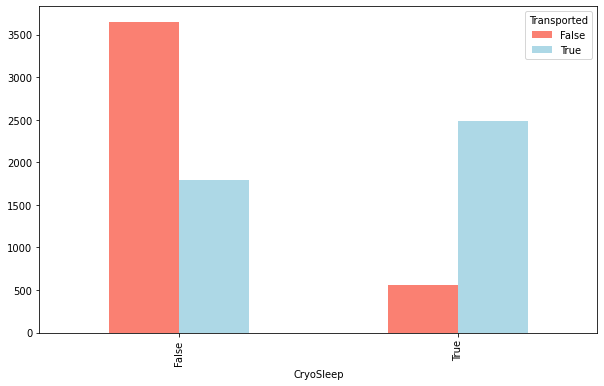

In [23]:
pd.crosstab(titanic_train['CryoSleep'], titanic_train['Transported']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
print(titanic_train.groupby(['CryoSleep'])['Transported'].mean()*100)

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int8   
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int8(1), object(4)
memory usage: 696.2+ KB


In [25]:
# Fill "Age" column nones by mean value

titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)
titanic_train["RoomService"].fillna(0, inplace=True)
titanic_train["FoodCourt"].fillna(0, inplace=True)
titanic_train["ShoppingMall"].fillna(0, inplace=True)
titanic_train["Spa"].fillna(0, inplace=True)
titanic_train["VRDeck"].fillna(0, inplace=True)
titanic_train["CryoSleep"].fillna(False, inplace=True)

titanic_train["HomePlanet"].fillna(titanic_train["HomePlanet"].mode()[0], inplace=True)
titanic_train["Cabin"].fillna(titanic_train["Cabin"].mode()[0], inplace=True)
titanic_train["Destination"].fillna(titanic_train["Destination"].mode()[0], inplace=True)
titanic_train["VIP"].fillna(titanic_train["VIP"].mode()[0], inplace=True)
titanic_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [8]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int8   
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), int8(1), object(2)
memory usage: 577.4+ KB


In [26]:
dic ={True: 1, False: 0}
titanic_train["CryoSleep"] = titanic_train["CryoSleep"].map(dic)
titanic_train["Transported"] = titanic_train["Transported"].map(dic)
titanic_train["VIP"] = titanic_train["VIP"].map(dic)
titanic_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [27]:
cabin_columns = ["Deck", "Num", "Side"]
temp = np.hstack(titanic_train["Cabin"].str.split("/")).reshape(-1, 3)

titanic_train[cabin_columns[0]] = temp[:, 0]
titanic_train[cabin_columns[1]] = temp[:, 1]
titanic_train[cabin_columns[2]] = temp[:, 2]

titanic_train.drop("Cabin", axis=1, inplace=True)
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,2,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,1,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,2,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,2,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,1,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [29]:
# Convert categorical features to few binominal
dummy_columns = ["Deck", "Side", "Destination", "HomePlanet"]
titanic_train = pd.concat([titanic_train, 
                           pd.get_dummies(titanic_train["Destination"], prefix='Destination'),
                           pd.get_dummies(titanic_train["HomePlanet"], prefix='HomePlanet'),
                           pd.get_dummies(titanic_train["Deck"], prefix='Deck'),
                           pd.get_dummies(titanic_train["Side"], prefix='Side')],
                           axis=1)
titanic_train.drop(dummy_columns, axis=1, inplace=True)
titanic_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [30]:
from sklearn.preprocessing import StandardScaler

scale_columns = ["VRDeck", "Spa", "ShoppingMall", "FoodCourt", "RoomService", "Age", "Num"]

scaler = StandardScaler()

titanic_train[scale_columns] = scaler.fit_transform(titanic_train[scale_columns])
# titanic_train.drop(scale_columns, axis=1, inplace=True)
titanic_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,-1.191744,...,0,1,0,0,0,0,0,0,1,0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,-1.191744,...,0,0,0,0,0,1,0,0,0,1
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,-1.191744,...,1,0,0,0,0,0,0,0,0,1
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,-1.191744,...,1,0,0,0,0,0,0,0,0,1
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,-1.189769,...,0,0,0,0,0,1,0,0,0,1


In [31]:
# Splitting the dataset on training and testing

from sklearn.model_selection import train_test_split

X = titanic_train.drop("Transported", axis=1)
y = titanic_train["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [33]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}


# Create an empty dictionary called results
results = {}

In [34]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# View the results
results

d:\python_projects\jupiter\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LinearSVC': 0.7814836112708453,
 'KNN': 0.772857964347326,
 'SVC': 0.7906843013225991,
 'LogisticRegression': 0.7814836112708453,
 'RandomForestClassifier': 0.8027602070155262}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_RFC = {'n_estimators': [i for i in range(1, 106, 15)],
             'max_depth': [i for i in range(1, 31, 3)]}

# Setup the grid search
grid_RFC = GridSearchCV(RandomForestClassifier(random_state=42, ),
                    param_RFC,
                    cv=5)

# Fit the grid search to the data
grid_RFC.fit(X_train, y_train)

# Find the best parameters
grid_RFC.best_params_, grid_RFC.best_score_

In [275]:
from sklearn.model_selection import cross_val_score

print(f"Accuracy {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='f1'))}")

Accuracy 0.7896057480490553
Recall 0.7423694716242661
Precision 0.8258663624578976
F1 0.7784800428982932


In [279]:
# Load the test and valid data
titanic_test = pd.read_csv("data/test.csv")
PassengerId = titanic_test["PassengerId"]
# Delete no needed (for my opinion) columns
titanic_test.drop(labels=["PassengerId", "Name"], axis=1, inplace=True)

# Fill "Age" column nones by mean value
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)
titanic_test["RoomService"].fillna(0, inplace=True)
titanic_test["FoodCourt"].fillna(0, inplace=True)
titanic_test["ShoppingMall"].fillna(0, inplace=True)
titanic_test["Spa"].fillna(0, inplace=True)
titanic_test["VRDeck"].fillna(0, inplace=True)
titanic_test["CryoSleep"].fillna(False, inplace=True)

titanic_test["HomePlanet"].fillna(titanic_test["HomePlanet"].mode()[0], inplace=True)
titanic_test["Cabin"].fillna(titanic_test["Cabin"].mode()[0], inplace=True)
titanic_test["Destination"].fillna(titanic_test["Destination"].mode()[0], inplace=True)
titanic_test["VIP"].fillna(titanic_test["VIP"].mode()[0], inplace=True)

titanic_test["CryoSleep"] = titanic_test["CryoSleep"].map(dic)
titanic_test["VIP"] = titanic_test["VIP"].map(dic)

temp = np.hstack(titanic_test["Cabin"].str.split("/")).reshape(-1, 3)
titanic_test[cabin_columns[0]] = temp[:, 0]
titanic_test[cabin_columns[1]] = temp[:, 1]
titanic_test[cabin_columns[2]] = temp[:, 2]
titanic_test.drop("Cabin", axis=1, inplace=True)

dummy_columns = ["Deck", "Side", "Destination", "HomePlanet"]
titanic_test = pd.concat([titanic_test, 
                           pd.get_dummies(titanic_test["Destination"], prefix='Destination'),
                           pd.get_dummies(titanic_test["HomePlanet"], prefix='HomePlanet'),
                           pd.get_dummies(titanic_test["Deck"], prefix='Deck'),
                           pd.get_dummies(titanic_test["Side"], prefix='Side')],
                           axis=1)
titanic_test.drop(dummy_columns, axis=1, inplace=True)

scaler2 = StandardScaler()

titanic_test[scale_columns] = scaler2.fit_transform(titanic_test[scale_columns])

titanic_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Destination_55 Cancri e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,-0.118222,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,-1.162210,0,...,0,0,0,0,0,0,1,0,0,1
1,0,-0.688601,0,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,-1.160262,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0.166968,0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,-1.168053,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0.666051,0,-0.357339,4.121518,-0.312173,-0.104002,0.226648,-1.166105,0,...,0,0,1,0,0,0,0,0,0,1
4,0,-0.617304,0,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,-1.158314,0,...,0,0,0,0,0,1,0,0,0,1


In [282]:
PassengerId

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [286]:
# Create resulting dataframe with predictions

result_predictions = pd.DataFrame({"PassengerId": PassengerId,
                                   "Transported": grid_RFC.best_estimator_.predict(titanic_test).astype('bool')})
result_predictions

# Save result to csv file

result_predictions.to_csv("data/space_ship_predictions1.csv", index=False)